This notebook analyzes the data found in moja global datasets for India and one of its state - Himachal Pradesh. 

In [1]:
import geopandas as gpd
import io, requests
import matplotlib.pyplot as plt

# 0. Functions Used

In [2]:
def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

# 1. Administrative Boundaries

In [3]:
#Administrative Boundaries of India and Himachal Pradesh
ind_bound = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL2_India.json'
ind_bound_all= 'D:\Projects\moja-global\Administrative_Boundaries\IND_ALL_states.json'
hp_bound = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL4_Himachal Pradesh.json'

In [4]:
#Dataframes of Adminitrative Boundaries files
ind_boundary = get_df(ind_bound)
ind_all = get_df(ind_bound_all)
hp_boundary = get_df(hp_bound)

In [5]:
print(type(ind_boundary))
display(ind_boundary)

<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


India has a total of 28 states and 8 union territories. They have been plotted as follows:

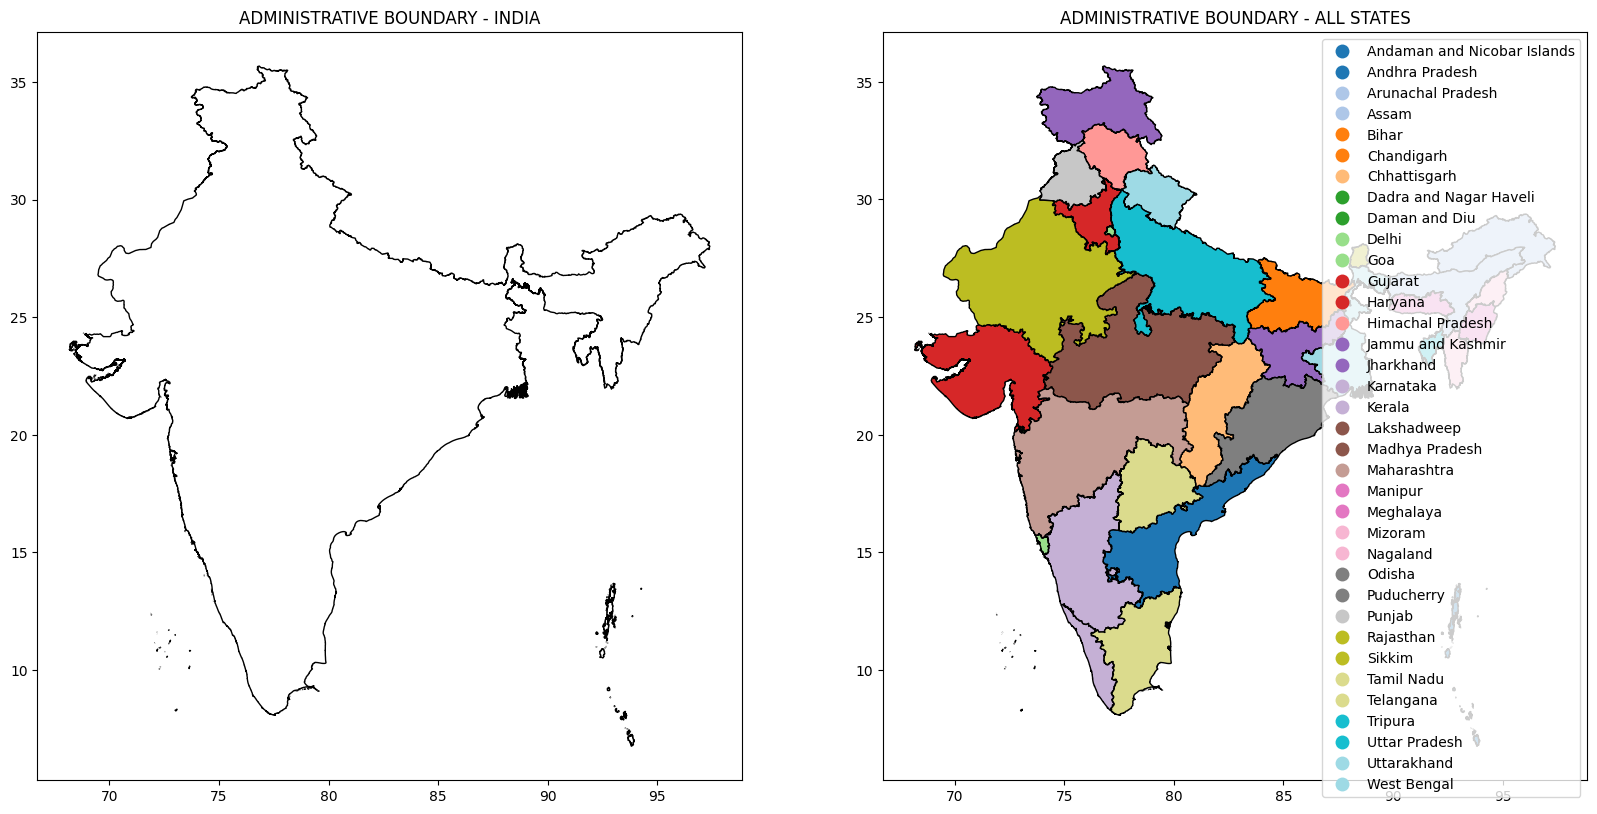

In [6]:
#Plotting the boundaries
ind_boundary  = ind_boundary[['name', 'geometry']]
ind_all = ind_all[['name', 'geometry']]
hp_boundary = hp_boundary[['name', 'geometry']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('ADMINISTRATIVE BOUNDARY - INDIA')
ax2.set_title('ADMINISTRATIVE BOUNDARY - ALL STATES')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_all, ax2, 'name')

plt.show()


This analysis also focuses on HP. HP is highlighted in the following map of India.

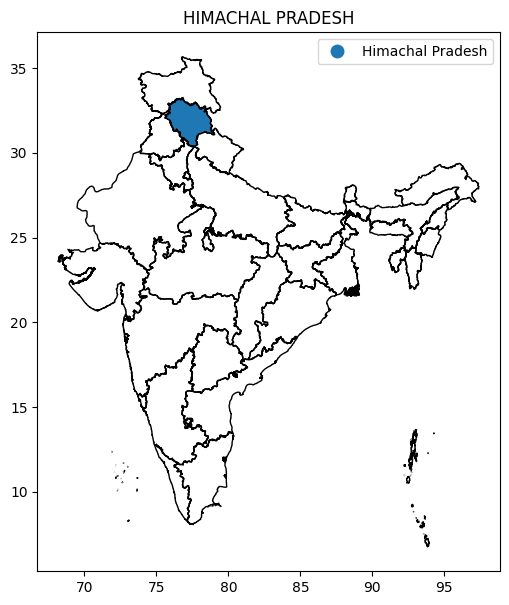

In [7]:
#Identifying Himachal Pradesh on the map of India
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('HIMACHAL PRADESH')
plot_boundary(ind_all, ax)
plot_feature(hp_boundary, ax, 'name')

plt.show()

# 2. Biodiversity Hotspots

* India has 4 biodiversity hotspots namely - the Himalayas, the Western Ghats, the Indo-Burma region and the Sundaland (Includes Nicobar group of Islands). <br>
* Himachal Pradesh lies in the Himalayan region.

In [8]:
#Biodiversity Hotspots of the world
bio_hotspot = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'
bio_hotspot_df = get_df(bio_hotspot)

HTTP Error 403: Forbidden
Retrieving the Dataframe from url.


In [9]:
print(type(bio_hotspot_df))
display(bio_hotspot_df.head(5))

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [10]:
#Standardising the column names
bio_hotspot_df.columns = column_std(bio_hotspot_df)

#Clipping the dataset to retain data about only India
ind_bio_df = clip_df(bio_hotspot_df, ind_boundary)
ind_bio_df = ind_bio_df[['name', 'geometry']]

#Clipping the dataset to retain data about only HP
hp_bio_df = clip_df(ind_bio_df, hp_boundary)

C:\Users\Ananyashree\anaconda3\envs\moja_global\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Ananyashree\anaconda3\envs\moja_global\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [11]:
print("India has the following Biodiversity Hotspots: ")
print(ind_bio_df['name'])

print("\nHimachal Pradesh has the following Biodiversity Hotspots: ")
print(hp_bio_df['name'])

India has the following Biodiversity Hotspots: 
21    Western Ghats and Sri Lanka
10                       Himalaya
12                     Indo-Burma
13                     Indo-Burma
39                      Sundaland
33                      Sundaland
Name: name, dtype: object

Himachal Pradesh has the following Biodiversity Hotspots: 
10    Himalaya
Name: name, dtype: object


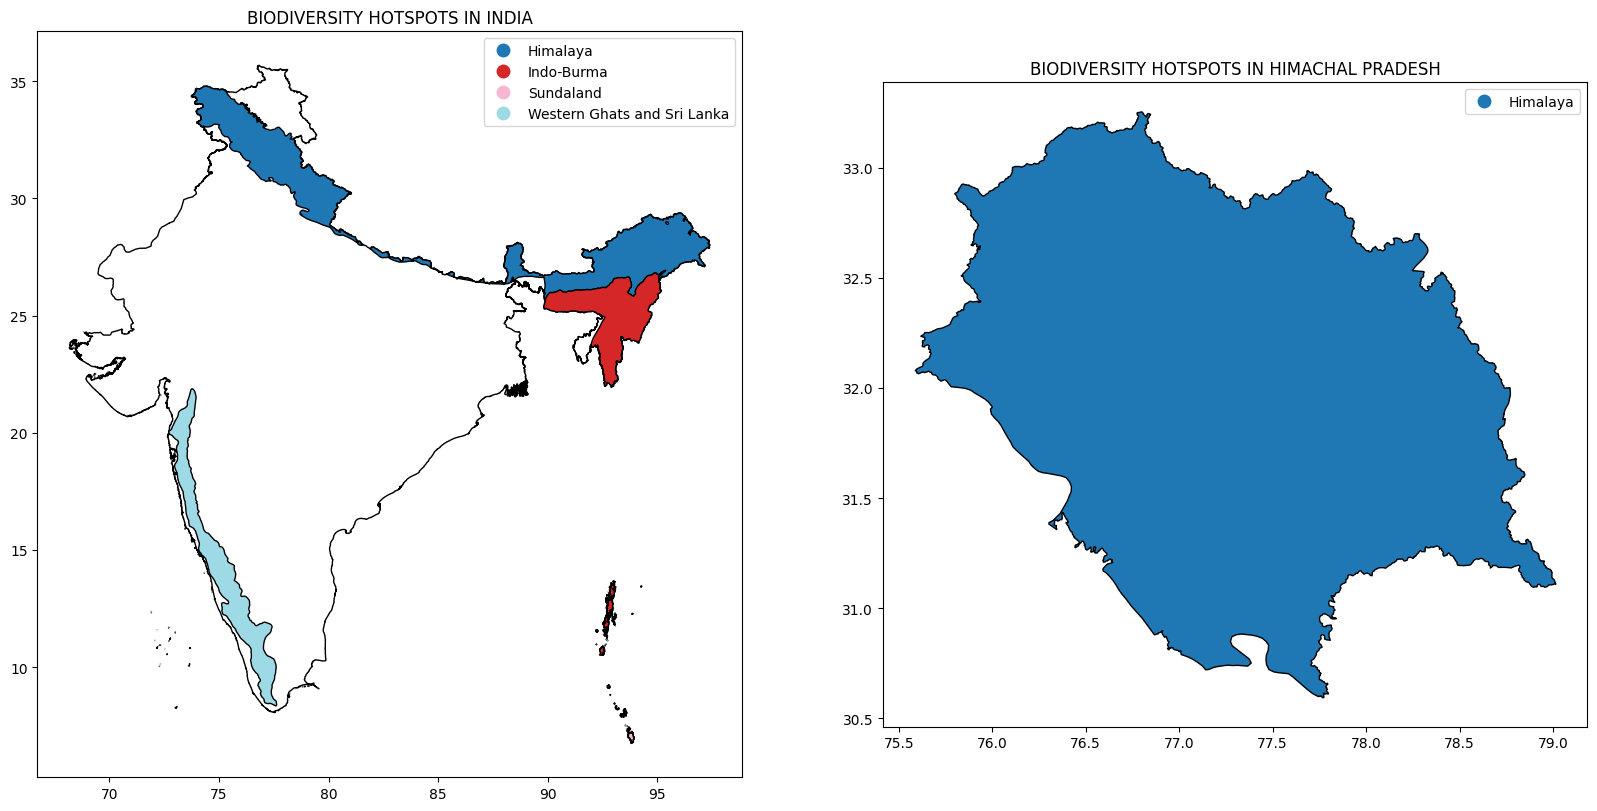

In [12]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('BIODIVERSITY HOTSPOTS IN INDIA')
ax2.set_title('BIODIVERSITY HOTSPOTS IN HIMACHAL PRADESH')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_bio_df, ax1, "name")
plot_feature(hp_bio_df, ax2, "name")

plt.show()

# 3. Forest Cover

In [13]:
ind_bound_gez = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL2_India_GEZ.json'
hp_bound_gez = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL4_Himachal Pradesh_GEZ.json'

In [14]:
ind_forest_df = get_df(ind_bound_gez)
hp_forest_df = get_df(hp_bound_gez)

In [15]:
print(ind_forest_df.head(5))

  country ISO3166_2   name                     gez_name  gez_code gez_abbrev  \
0     IND            India  Subtropical mountain system        25         SM   
1     IND            India           Subtropical steppe        23       SBSh   
2     IND            India    Temperate mountain system        35        TeM   
3     IND            India              Tropical desert        15       TBWh   
4     IND            India          Tropical dry forest        13       TAwb   

   adminlevel                                           geometry  
0           2  MULTIPOLYGON (((93.38087 27.46374, 93.44117 27...  
1           2  MULTIPOLYGON (((73.92919 34.30517, 73.92148 34...  
2           2  MULTIPOLYGON (((78.26877 34.63843, 78.26877 34...  
3           2  MULTIPOLYGON (((69.25014 22.26431, 69.25014 22...  
4           2  MULTIPOLYGON (((79.70680 10.28820, 79.70292 10...  


In [16]:
#Standardising columns
ind_forest_df.columns = column_std(ind_forest_df)
ind_forest_df = ind_forest_df[['gez_name', 'geometry']]

hp_forest_df.columns = column_std(hp_forest_df)
hp_forest_df = hp_forest_df[['gez_name', 'geometry']]

In [17]:
print("India has the following forests: ")
print(ind_forest_df['gez_name'])

print("\nHimachal has the following forests: ")
print(hp_forest_df['gez_name'])

India has the following forests: 
0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
Name: gez_name, dtype: object

Himachal has the following forests: 
0    Subtropical mountain system
1          Tropical moist forest
Name: gez_name, dtype: object


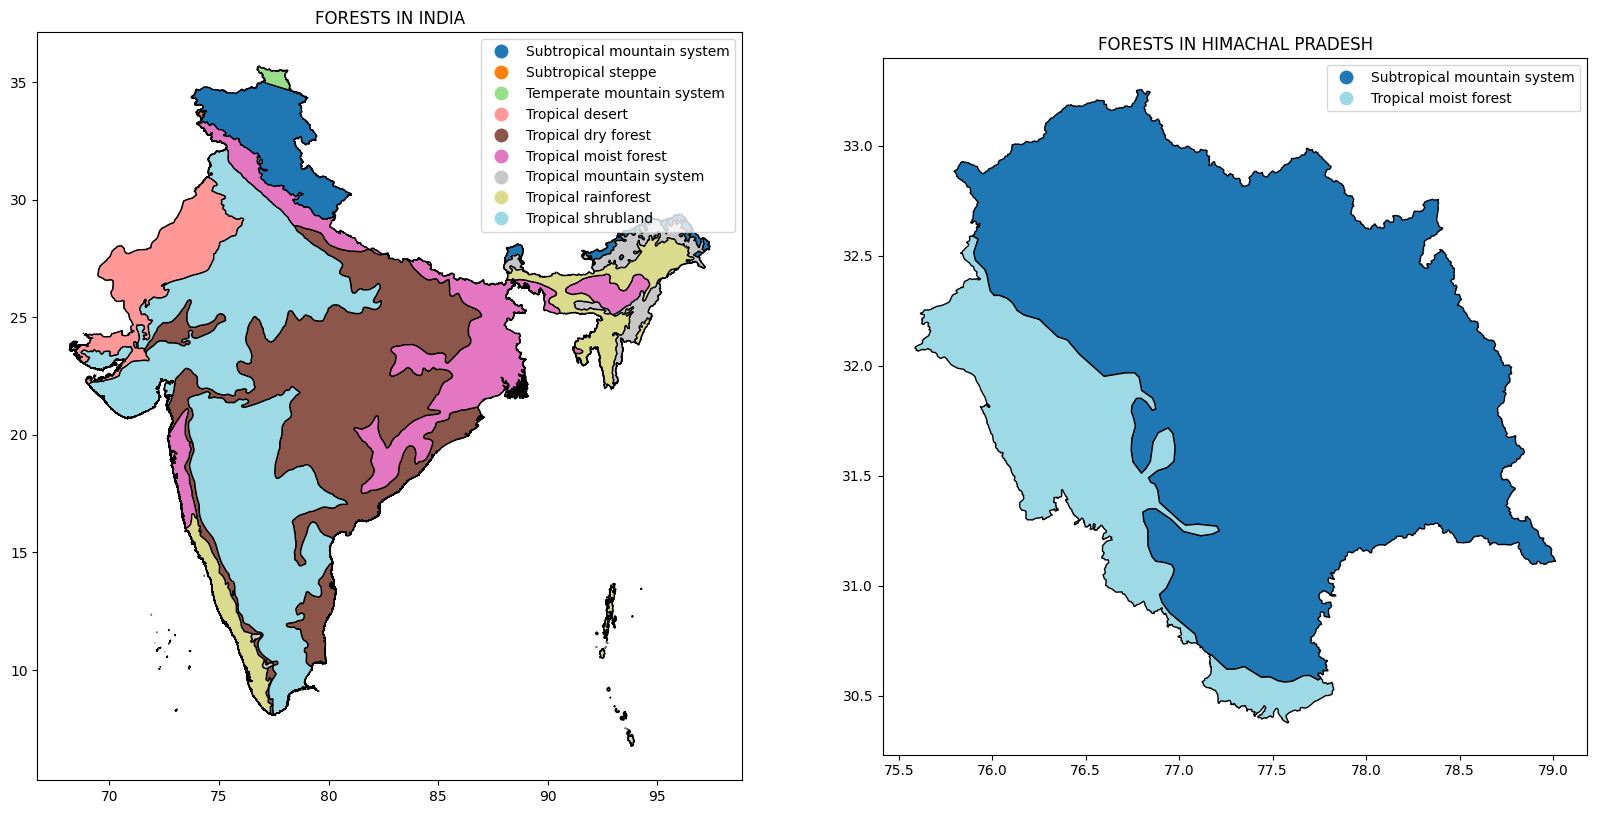

In [18]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('FORESTS IN INDIA')
ax2.set_title('FORESTS IN HIMACHAL PRADESH')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_forest_df, ax1, "gez_name")
plot_feature(hp_forest_df, ax2, "gez_name")

plt.show()

# 4. Soil Cover

In [19]:
ind_bound_wsr = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL2_India_WSR.json'
hp_bound_wsr = 'D:\Projects\moja-global\Administrative_Boundaries\IND_AL4_Himachal Pradesh_WSR.json'

In [20]:
ind_soil_df = get_df(ind_bound_wsr)
hp_soil_df = get_df(hp_bound_wsr)

display(ind_soil_df.head(5))

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,,India,AC,23,Acrisol,2,"MULTIPOLYGON (((92.56884 10.80253, 92.56764 10..."
1,IND,,India,AR,3,Arenosol,2,"MULTIPOLYGON (((69.62064 24.26911, 69.61684 24..."
2,IND,,India,CL,29,Calcisol,2,"MULTIPOLYGON (((68.89517 24.25835, 68.89476 24..."
3,IND,,India,CM,2,Cambisol,2,"MULTIPOLYGON (((88.33736 26.47869, 88.33716 26..."
4,IND,,India,FL,20,Fluvisol,2,"MULTIPOLYGON (((91.37963 23.14395, 91.32592 23..."


In [21]:
#Standardising columns
ind_soil_df.columns = column_std(ind_soil_df)
ind_soil_df = ind_soil_df[['ipcc', 'geometry']]

hp_soil_df.columns = column_std(hp_soil_df)
hp_soil_df = hp_soil_df[['ipcc', 'geometry']]

In [22]:
print("Soils found in India: ")
print(ind_soil_df['ipcc'])

print("\nSoils found in Himachal Pradesh: ")
print(hp_soil_df['ipcc'])

Soils found in India: 
0         Acrisol
1        Arenosol
2        Calcisol
3        Cambisol
4        Fluvisol
5         Gleysol
6        Leptosol
7         Luvisol
8         Lixisol
9         Nitisol
10       Vertisol
11    Waterbodies
Name: ipcc, dtype: object

Soils found in Himachal Pradesh: 
0    Cambisol
1    Leptosol
Name: ipcc, dtype: object


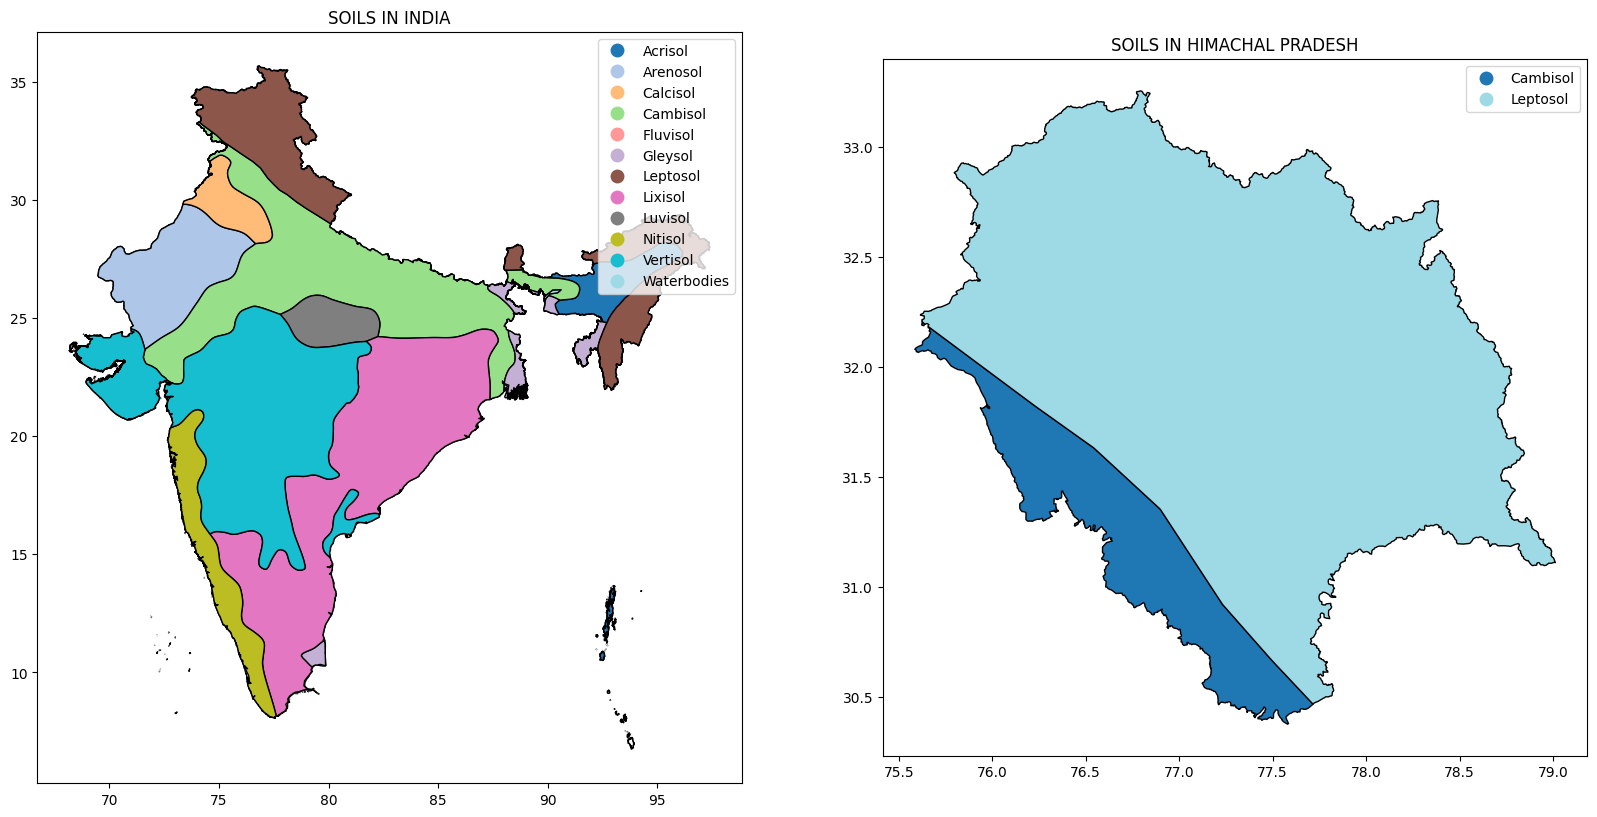

In [23]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('SOILS IN INDIA')
ax2.set_title('SOILS IN HIMACHAL PRADESH')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_soil_df, ax1, "ipcc")
plot_feature(hp_soil_df, ax2, "ipcc")

plt.show()

# 4. Agro-Ecological Zones

In [24]:
#Agro-Ecological Zones
agroeco_zones = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'

In [25]:
agroeco_df = get_df(agroeco_zones)
agroeco_df.head(5)

HTTP Error 403: Forbidden
Retrieving the Dataframe from url.


,Value,geometry
0,1,"POLYGON ((-33.50000 83.65000, -33.50000 83.500..."
1,1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500..."
2,1,"POLYGON ((-32.35000 83.60000, -32.35000 83.500..."
3,1,"POLYGON ((-31.25000 83.60000, -31.25000 83.500..."
4,1,"POLYGON ((-34.25000 83.60000, -34.25000 83.500..."


In [26]:
# Replacing the data that was in codes
classification = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}


#Standardising column names
agroeco_df.columns = column_std(agroeco_df)

#Renaming value
agroeco_df.value = agroeco_df.value.astype('str').replace(classification)

In [27]:
#Clipping the dataset to retain only necessary data
ind_eco_df = clip_df(agroeco_df, ind_boundary)
hp_eco_df = clip_df(ind_eco_df, hp_boundary)

C:\Users\Ananyashree\anaconda3\envs\moja_global\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Ananyashree\anaconda3\envs\moja_global\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [28]:
print("Some of the Agro-Ecological zones in India: ")
print(ind_eco_df['value'].head(5))

print("\nSome of Agro-Ecological zones in Himachal Pradesh: ")
print(hp_eco_df['value'].head(5))

Some of the Agro-Ecological zones in India: 
81778          Irrigated Soils
81777          Irrigated Soils
81776          Irrigated Soils
81780          Irrigated Soils
81730    Moist, moderate soils
Name: value, dtype: object

Some of Agro-Ecological zones in Himachal Pradesh: 
85158        Steep terrain
78100      Irrigated Soils
70100    Humid, poor soils
70098    Humid, good soils
72766    Humid, good soils
Name: value, dtype: object


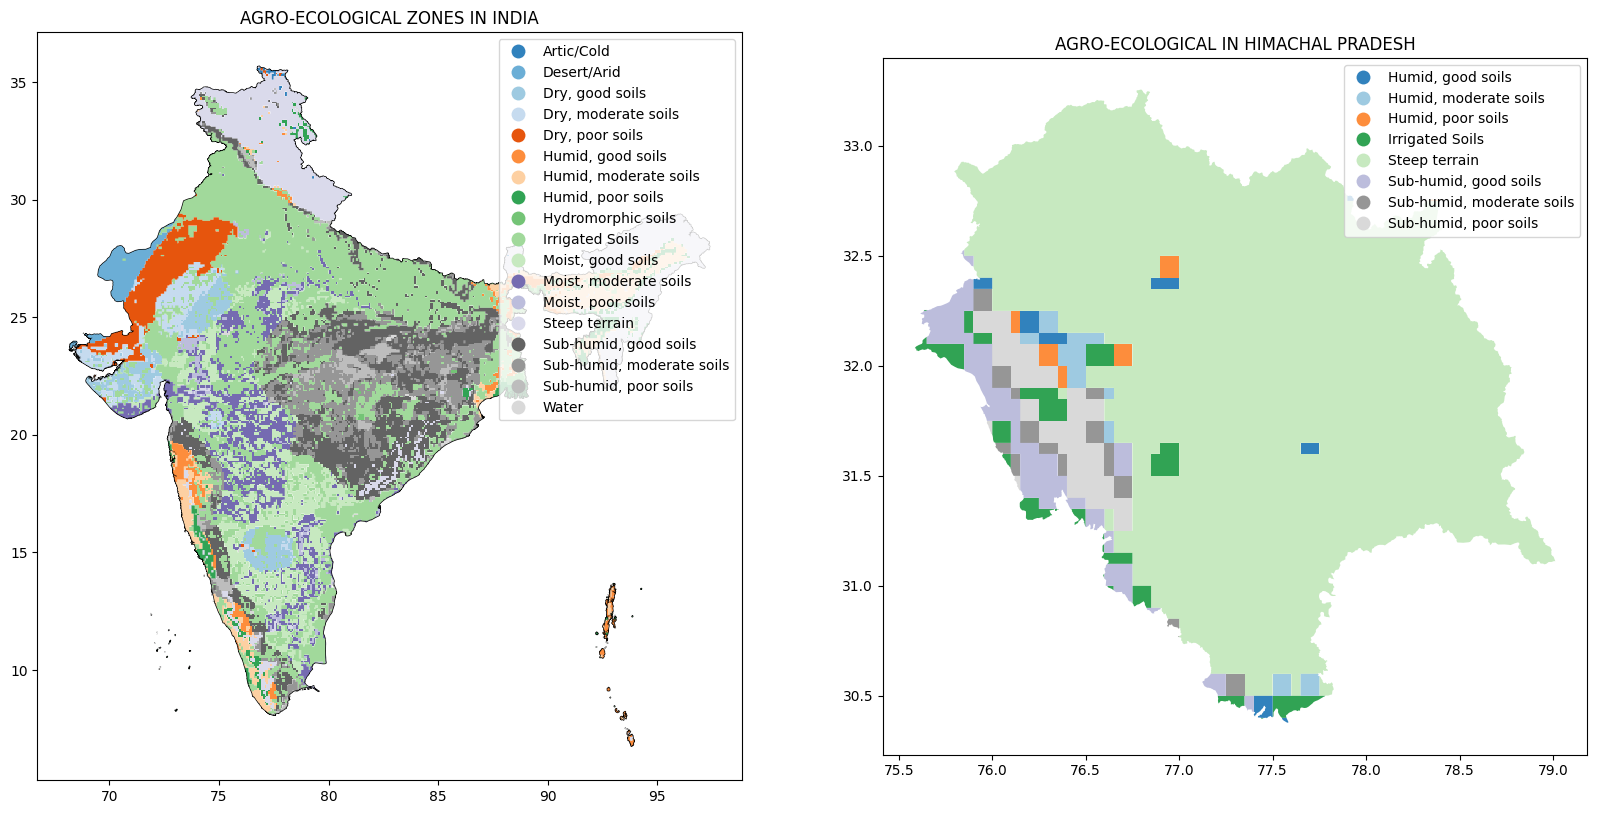

In [29]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('AGRO-ECOLOGICAL ZONES IN INDIA')
ax2.set_title('AGRO-ECOLOGICAL IN HIMACHAL PRADESH')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_eco_df, ax1, 'value', 'none', 'tab20c')
plot_feature(hp_eco_df, ax2, 'value', 'none', 'tab20c')

plt.show()